# **Task 2**

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.spatial.distance import pdist, squareform
from sklearn.ensemble import IsolationForest

In [2]:
# Reading in the data
paths = [
    "./data/task_2_1.csv",
    "./data/task_2_2.csv",
    "./data/task_2_3.csv",
    "./data/task_2_4.csv",
    "./data/task_2_5.csv",
    "./data/task_2_6.csv"
]
data = [pd.read_csv(path) for path in paths]

In [3]:
# Displaying the first few rows of data for each dataframe
for df in data:
    display(df.head())

,Unnamed: 0,a,mean_energy,mean_contrast,std_energy,std_contrast,median_energy,median_contrast,energy_snr,contrast_snr
0,0,3.1,37.992097,0.311432,4.123889,0.084536,38.141604,0.319297,7.724632,11.007838
1,1,3.4,60.048271,0.260671,3.895653,0.073263,59.759403,0.277134,6.582050,11.304082
2,2,3.5,58.321677,0.281026,3.032370,0.070682,58.129885,0.305008,4.855253,11.413264
3,3,4.0,32.375544,0.320317,2.767586,0.094760,32.637530,0.329756,6.585677,11.234472
4,4,4.1,68.722782,0.265221,4.707114,0.085551,69.137270,0.274375,6.333661,11.159099


,Unnamed: 0,a,mean_energy,mean_contrast,std_energy,std_contrast,median_energy,median_contrast,energy_snr,contrast_snr
0,0,3.0,0.270786,2.531904,0.035576,0.073762,0.276669,2.530104,8.068694,3.613014
1,1,3.1,7.128662,1.021937,0.851961,0.089696,7.058369,1.039002,5.228306,7.906499
2,2,3.2,26.375311,0.519799,2.503867,0.069369,26.253333,0.541310,6.138581,10.201640
3,3,3.3,55.197994,0.343722,3.387852,0.055017,55.399132,0.360524,5.893182,11.078639
4,4,3.4,74.625668,0.329177,5.099525,0.057299,74.549204,0.345768,6.271722,11.064695


,Unnamed: 0,a,mean_energy,mean_contrast,std_energy,std_contrast,median_energy,median_contrast,energy_snr,contrast_snr
0,0,0.0,35.608458,0.841494,6.457430,0.059976,37.163639,0.854785,9.576465,9.913219
1,1,3.4,28.818721,0.893026,2.914978,0.043390,28.819715,0.895179,6.419717,8.847990
2,2,4.0,39.921904,0.781064,7.265027,0.056716,41.739067,0.789173,9.889323,9.801451
3,3,4.1,60.931396,0.650456,8.398930,0.058784,62.030557,0.652516,9.135087,9.802450
4,4,4.2,67.143541,0.615903,7.414007,0.064968,67.802938,0.619589,7.679061,10.460651


,Unnamed: 0,a,mean_energy,mean_contrast,std_energy,std_contrast,median_energy,median_contrast,energy_snr,contrast_snr
0,0,3.1,0.924783,0.941806,0.081399,0.042190,0.917777,0.940056,4.805475,4.803775
1,1,3.2,0.917534,1.865911,0.287478,0.145336,0.864613,1.832305,7.646059,7.186028
2,2,3.3,7.652349,0.644774,2.476352,0.097374,6.945435,0.653830,12.230918,9.764403
3,3,3.4,37.272209,0.353548,4.360598,0.038707,37.620513,0.358052,8.489166,8.517114
4,4,3.5,51.530923,0.349240,6.065933,0.033550,51.208851,0.354172,7.657716,8.402396


,Unnamed: 0,a,mean_energy,mean_contrast,std_energy,std_contrast,median_energy,median_contrast,energy_snr,contrast_snr
0,0,4.0,119.509397,0.319350,6.043708,0.043563,119.205627,0.334923,5.320942,9.564983
1,1,4.1,118.522956,0.301935,5.764359,0.041965,118.593805,0.316472,5.692218,9.353017
2,2,4.2,142.154059,0.291655,6.703512,0.039075,141.573808,0.304916,5.862572,9.325854
3,3,4.3,146.160206,0.286448,5.829100,0.033188,145.683545,0.294996,5.521798,9.003197
4,4,4.4,78.649158,0.277262,3.788310,0.036011,78.714050,0.286017,5.981535,9.311333


,Unnamed: 0,a,mean_energy,mean_contrast,std_energy,std_contrast,median_energy,median_contrast,energy_snr,contrast_snr
0,0,3.1,27.862466,0.637465,2.675114,0.064424,27.715800,0.640917,6.114458,9.491176
1,1,3.2,47.072767,0.385633,3.080297,0.043790,47.071754,0.393590,6.092193,10.142183
2,2,3.3,82.462108,0.337509,4.248827,0.037848,82.382583,0.346055,5.568575,10.145822
3,3,3.4,97.846071,0.325679,4.517787,0.042100,97.799523,0.340934,5.434113,10.569802
4,4,3.5,94.477028,0.313556,4.083478,0.052772,94.330571,0.334239,4.747189,11.305113


In [4]:
# Drop the first column, not necessary
for df in data:
    df = df.drop(df.columns[0], axis=1)
    print(df.columns)

Index(['a', 'mean_energy', 'mean_contrast', 'std_energy', 'std_contrast',
       'median_energy', 'median_contrast', 'energy_snr', 'contrast_snr'],
      dtype='object')
Index(['a', 'mean_energy', 'mean_contrast', 'std_energy', 'std_contrast',
       'median_energy', 'median_contrast', 'energy_snr', 'contrast_snr'],
      dtype='object')
Index(['a', 'mean_energy', 'mean_contrast', 'std_energy', 'std_contrast',
       'median_energy', 'median_contrast', 'energy_snr', 'contrast_snr'],
      dtype='object')
Index(['a', 'mean_energy', 'mean_contrast', 'std_energy', 'std_contrast',
       'median_energy', 'median_contrast', 'energy_snr', 'contrast_snr'],
      dtype='object')
Index(['a', 'mean_energy', 'mean_contrast', 'std_energy', 'std_contrast',
       'median_energy', 'median_contrast', 'energy_snr', 'contrast_snr'],
      dtype='object')
Index(['a', 'mean_energy', 'mean_contrast', 'std_energy', 'std_contrast',
       'median_energy', 'median_contrast', 'energy_snr', 'contrast_snr'],
  

In [5]:
# Compute general statistics for each dataset
statistics = []
for df in data:
    statistics.append({'mean_energy': df['mean_energy'].mean(),
        'mean_contrast': df['mean_contrast'].mean(),
        'std_energy': df['std_energy'].mean(),
        'std_contrast': df['std_contrast'].mean(),
        'median_energy': df['median_energy'].mean(),
        'median_contrast': df['median_contrast'].mean(),
        'energy_snr': df['energy_snr'].mean(),
        'contrast_snr': df['contrast_snr'].mean()
    })

In [6]:
# Convert to a dataframe 
statistics = pd.DataFrame(statistics)
statistics['dataset'] = statistics.index + 1
display(statistics)

,mean_energy,mean_contrast,std_energy,std_contrast,median_energy,median_contrast,energy_snr,contrast_snr,dataset
0,93.332454,0.271171,4.579258,0.066873,93.178670,0.286265,5.216309,11.237626,1
1,90.946459,0.426434,5.828010,0.057549,91.344279,0.439463,6.706189,10.313946,2
2,62.079655,0.698392,4.847336,0.059865,62.065811,0.706316,6.080848,10.168250,3
3,106.151470,0.357191,5.739140,0.036403,106.488043,0.364091,6.813977,8.493955,4
4,116.962536,0.314508,4.478689,0.030870,116.871668,0.321490,5.446354,8.360830,5
5,124.695235,0.309271,5.698683,0.047034,124.772616,0.322447,6.044927,10.858734,6


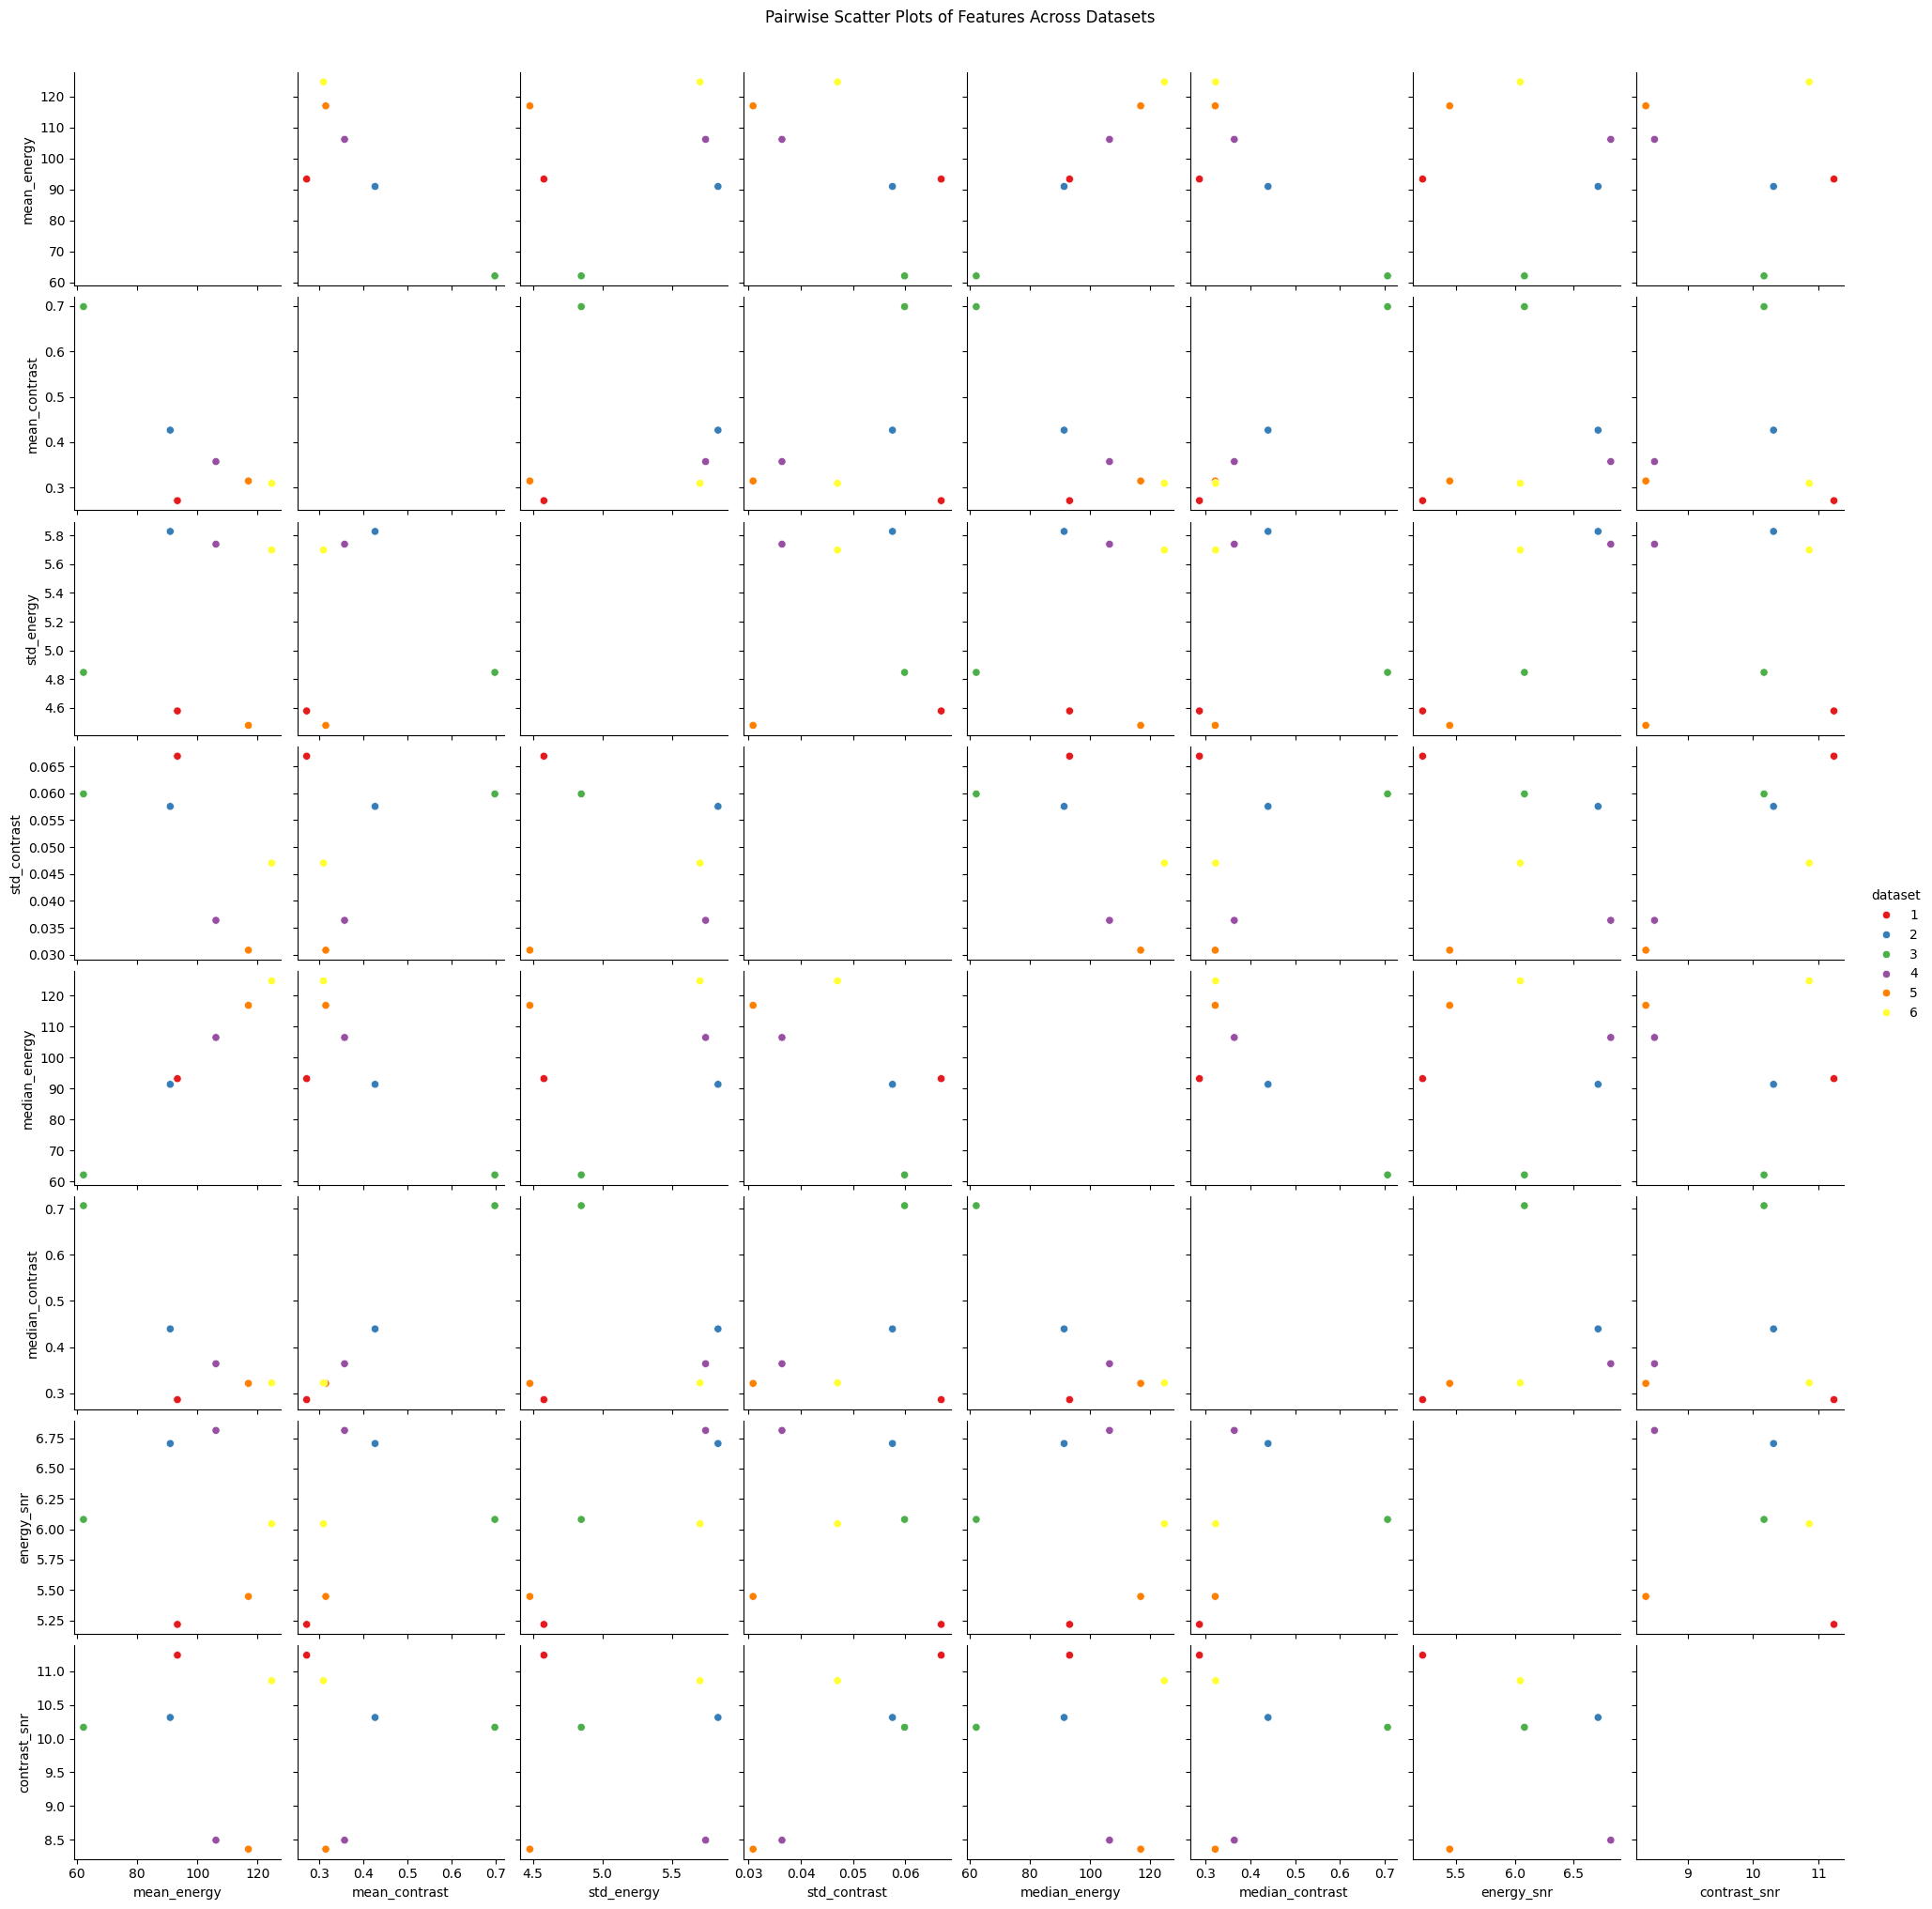

In [7]:
sns.pairplot(statistics, hue='dataset', palette='Set1')
plt.suptitle('Pairwise Scatter Plots of Features Across Datasets', y=1.02)
plt.show()

On basis of a first glance at the graph, the green dot (also known as data set 3) is a common outlier accross features. 

In [8]:
# Apply IsolationForest model to find outliers
model = IsolationForest(contamination=0.1)
model_data = pd.concat(data, ignore_index=True)
model.fit(model_data)
predictions = model.predict(model_data)
outlier_indices = np.where(predictions == -1)[0]
print("Indices of outliers:", outlier_indices)

Indices of outliers: [ 16  46  47  48  56  66  70  85  95 106 107 116 119 123 143 151 152 153
 154 155 159 160 161 168 170 176 181 202 227 259 286 306]


In [9]:
# Map indices back to original data
data_sizes = [len(df) for df in data]
cumulative_sizes = np.cumsum(data_sizes)

def find_dataset(index):
    for i, size in enumerate(cumulative_sizes):
        if index < size:
            return i
    return None

# Find outlier datasets
outlier_datasets = [find_dataset(index) for index in outlier_indices]

for index, dataset in zip(outlier_indices, outlier_datasets):
    print(f"Outlier index {index}, dataset {dataset + 1}")

Outlier index 16, dataset 1
Outlier index 46, dataset 1
Outlier index 47, dataset 2
Outlier index 48, dataset 2
Outlier index 56, dataset 2
Outlier index 66, dataset 2
Outlier index 70, dataset 2
Outlier index 85, dataset 2
Outlier index 95, dataset 2
Outlier index 106, dataset 3
Outlier index 107, dataset 3
Outlier index 116, dataset 3
Outlier index 119, dataset 3
Outlier index 123, dataset 3
Outlier index 143, dataset 3
Outlier index 151, dataset 3
Outlier index 152, dataset 3
Outlier index 153, dataset 4
Outlier index 154, dataset 4
Outlier index 155, dataset 4
Outlier index 159, dataset 4
Outlier index 160, dataset 4
Outlier index 161, dataset 4
Outlier index 168, dataset 4
Outlier index 170, dataset 4
Outlier index 176, dataset 4
Outlier index 181, dataset 4
Outlier index 202, dataset 4
Outlier index 227, dataset 5
Outlier index 259, dataset 5
Outlier index 286, dataset 6
Outlier index 306, dataset 6


Datasets 2, 3, 4, have the highest number of outliers and are of the most interest currently. Dataset 1, 5, and 6 appear to have the least amount. This further leans towards Dataset 3 as it was also visually an outlier when plotted above.

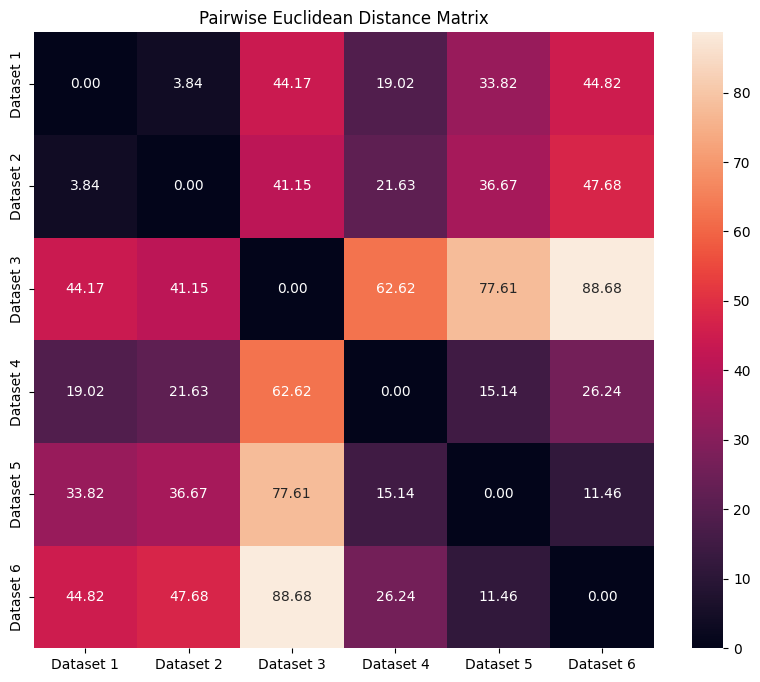

The outlier is: Dataset 3


In [10]:
# Compute pairwise euclidean distances
distances = pdist(statistics, metric='euclidean')

# Convert to matrix for easier visualization (1D -> 2D)
matrix = squareform(distances)
df = pd.DataFrame(matrix, columns=[f'Dataset {i}' for i in range(1, 7)], 
                            index=[f'Dataset {i}' for i in range(1, 7)])

plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, fmt='.2f', cbar=True)
plt.title('Pairwise Euclidean Distance Matrix')
plt.show()

mean = df.mean(axis=1)
outlier = mean.idxmax()
print(f"The outlier is: {outlier}")

By computing and visualizing the pairwise Euclidean distance between the datasets, it is easily distinguishable that dataset 3 is the outlier in this case. Further backed by the IsolationForest model and the pairwise scatter plots, it is even more so evidenced that dataset 3 is the outlier.